# [Tutorial] Introduction to Python Exception

## Reference

RealPython : [Python Exceptions (An Introduction)](https://realpython.com/python-exceptions/)

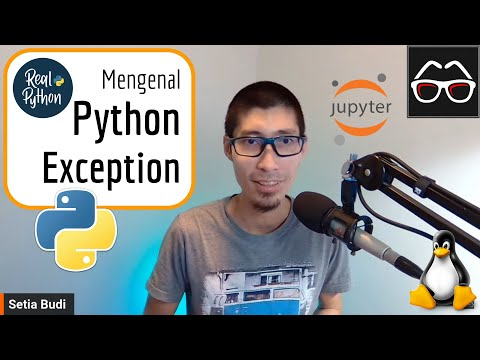

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("xnc3Yi13SpE")

## Syntax Error and Exception

##### Syntax errors occur when the parser detects an incorrect statement

In [1]:
print(0/0))

SyntaxError: unmatched ')' (1305762554.py, line 1)

##### Exception error is a type of error occurs whenever syntactically correct, Python code results in an error.

In [2]:
print(0/0)

ZeroDivisionError: division by zero

Instead of just writing exception error, Python details what type of exception error it encountered. In this case, it was a ZeroDivisionError. Python comes with [various built-in exceptions](https://docs.python.org/3/library/exceptions.html) as well as the possibility to create user-defined exceptions.

## Raising an Exception in Python

In [3]:
number = 10
if number > 5:
    raise Exception(f"The number should not exceed 5. ({number=})")
print(number)

Exception: The number should not exceed 5. (number=10)

## Debugging During Development With `assert`

In [4]:
number = 6
assert (number < 5), f"The number should not exceed 5. ({number=})"
print(number)

AssertionError: The number should not exceed 5. (number=6)

In [5]:
# !python -O low.py

## Handling Exceptions With the `try` and `except` Block

In [6]:
def linux_interaction():
    import sys
    if "linux" not in sys.platform:
        raise RuntimeError("Function can only run on Linux systems.")
    print("Doing Linux things.")

In [7]:
import sys
sys.platform

'darwin'

In [8]:
linux_interaction()

RuntimeError: Function can only run on Linux systems.

##### Bad practice

In [9]:
try:
    linux_interaction()
except:
    pass

##### Not quite a good practice

In [10]:
try:
    linux_interaction()
except:
    print("Linux function wasn't executed.")

Linux function wasn't executed.


##### Good practice

In [11]:
try:
    linux_interaction()
except RuntimeError as error:
    print(error)
    print("The linux_interaction() function wasn't executed.")

Function can only run on Linux systems.
The linux_interaction() function wasn't executed.


##### Examples

Case #1

In [12]:
try:
    with open("file.log") as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)

[Errno 2] No such file or directory: 'file.log'


Case #2

In [13]:
try:
    linux_interaction()
    with open("file.log") as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)
except RuntimeError as error:
    print(error)
    print("Linux linux_interaction() function wasn't executed.")

Function can only run on Linux systems.
Linux linux_interaction() function wasn't executed.


##### Few key takeaways

Here are the key takeaways about using Python’s try … except statements:

- Python executes a `try` clause up until the point where it encounters the first exception.
- Inside the `except` clause—the exception handler—you determine how the program responds to the exception.
- You can anticipate multiple exceptions and differentiate how the program should respond to them.
- Avoid using bare `except` clauses, because they can hide unexpected exceptions.

## Proceeding After a Successful `try` With `else`

In [14]:
def linux_interaction():
    import sys
    if "linux" not in sys.platform:
        raise RuntimeError("Function can only run on Linux systems.")
    print("Doing Linux things.")

You can use Python’s `else` statement to instruct a program to execute a certain block of code only in the absence of exceptions

In [15]:
try:
    linux_interaction()
except RuntimeError as error:
    print(error)
else:
    print("Doing even more Linux things.")

Function can only run on Linux systems.


In [16]:
try:
    linux_interaction()
except RuntimeError as error:
    print(error)
print("Doing even more Linux things.")

Function can only run on Linux systems.
Doing even more Linux things.


If you don’t nest the `print()` call under the `else` clause, then it’ll execute even if Python encounters the `RuntimeError` that you handle in the `except` block above.

In [17]:
try:
    linux_interaction()
except RuntimeError as error:
    print(error)
else:
    try:
        with open("file.log") as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)

Function can only run on Linux systems.


## Cleaning Up After Execution With `finally`

Imagine that you always had to implement some sort of action to clean up after executing your code. Python enables you to do so using the `finally` clause

In [18]:
try:
    linux_interaction()
except RuntimeError as error:
    print(error)
else:
    try:
        with open("file.log") as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)
finally:
    print("Cleaning up, irrespective of any exceptions.")

Function can only run on Linux systems.
Cleaning up, irrespective of any exceptions.


This can be helpful because even code outside of a try… except block won’t necessarily execute if your script encounters an unhandled exception. This helps you make sure that resources like file handles and database connections are cleaned up properly.

## Creating Custom Exceptions in Python

In [19]:
class PlatformException(Exception):
    """Incompatible platform."""

def linux_interaction():
    import sys
    if "linux" not in sys.platform:
        raise PlatformException("Function can only run on Linux systems.")
    print("Doing Linux things.")

In [20]:
linux_interaction()

PlatformException: Function can only run on Linux systems.

In [21]:
try:
    linux_interaction()
except PlatformException as e:
    print(f"Platform related issue: {e}")

Platform related issue: Function can only run on Linux systems.


## End of Workshop